# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [9]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import seaborn as sns
import numpy as np
# Create a new dataframe from your CSV
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [10]:
# Print out any information you need to understand your dataframe
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

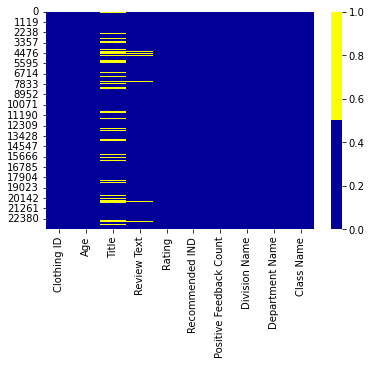

In [8]:
# Plot a heatmap of any missing data
cols = df.columns[1:]
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

In [18]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))

Unnamed: 0 - 0.0%
Clothing ID - 0.0%
Age - 0.0%
Title - 16.22243038405859%
Review Text - 3.5978881035510515%
Rating - 0.0%
Recommended IND - 0.0%
Positive Feedback Count - 0.0%
Division Name - 0.059609980413863575%
Department Name - 0.059609980413863575%
Class Name - 0.059609980413863575%
Title_ismissing - 0.0%
Review Text_ismissing - 0.0%
Division Name_ismissing - 0.0%
Department Name_ismissing - 0.0%
Class Name_ismissing - 0.0%
num_missing - 0.0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

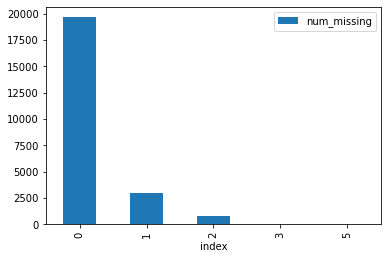

In [15]:
# Plot a missing data histogram

# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [21]:
# Handle any missing data in your dataframe.
#df['Title'] = df['Title'].fillna('_MISSING_')
df_notitle = df.drop(['Title'],axis=1)
df_notitle.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

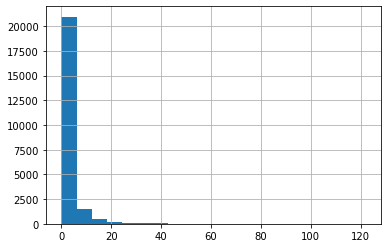

In [34]:
# Plot a histogram to see if there are any outliers.
df['Positive Feedback Count'].hist(bins=20)
#df.hist()

In [25]:
# Use the describe() method
#df.info()
df['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<AxesSubplot:>

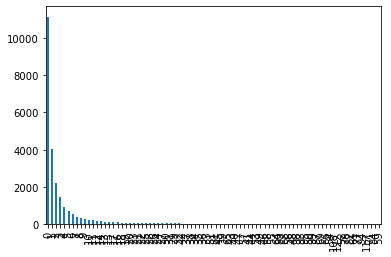

In [32]:
# Plot a bar chart
#df.boxplot(column=['Positive Feedback Count'])
df['Positive Feedback Count'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [11]:
# Lookl for any irrelevant data in the dataframe. How will you handle it?

In [ ]:
# Look for duplicates. How will you handle any duplicates?

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [36]:
# Try to convert all the strings in a column to lower or upper case. 
df['Department Name'].str.lower()


0        intimate
1         dresses
2         dresses
3         bottoms
4            tops
           ...   
23481     dresses
23482        tops
23483     dresses
23484     dresses
23485     dresses
Name: Department Name, Length: 23486, dtype: object